In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [61]:

import yfinance as yf 
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

sp500


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-16 00:00:00-05:00,6800.120117,6819.270020,6759.740234,6800.259766,4983180000,0.0,0.0
2025-12-17 00:00:00-05:00,6802.879883,6812.259766,6720.430176,6721.430176,5122120000,0.0,0.0
2025-12-18 00:00:00-05:00,6778.060059,6816.129883,6758.500000,6774.759766,5101190000,0.0,0.0


In [62]:
sp500.index #forslicing

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-12-09 00:00:00-05:00', '2025-12-10 00:00:00-05:00',
               '2025-12-11 00:00:00-05:00', '2025-12-12 00:00:00-05:00',
               '2025-12-15 00:00:00-05:00', '2025-12-16 00:00:00-05:00',
               '2025-12-17 00:00:00-05:00', '2025-12-18 00:00:00-05:00',
               '2025-12-19 00:00:00-05:00', '2025-12-22 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24611, freq=None)

<Axes: xlabel='Date'>

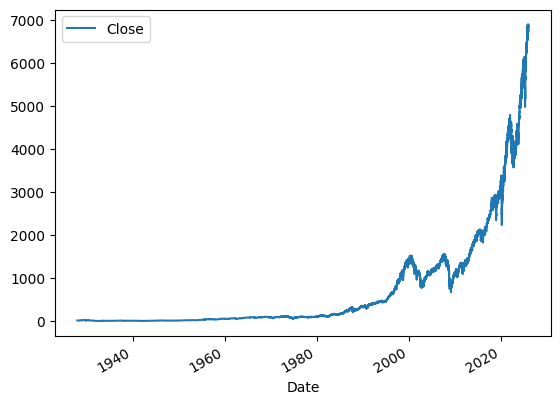

In [63]:
sp500.plot.line(y="Close", use_index=True) #chart of sp500 price history

In [64]:
del sp500["Dividends"]
del sp500["Stock Splits"] #useful for individual stocks 

In [65]:
#Target if price will go up or down
sp500["Tomorrow"] = sp500["Close"].shift(-1) #shifting prices back by one day
sp500

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-12-16 00:00:00-05:00,6800.120117,6819.270020,6759.740234,6800.259766,4983180000,6721.430176
2025-12-17 00:00:00-05:00,6802.879883,6812.259766,6720.430176,6721.430176,5122120000,6774.759766
2025-12-18 00:00:00-05:00,6778.060059,6816.129883,6758.500000,6774.759766,5101190000,6834.500000


In [66]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-12-16 00:00:00-05:00,6800.120117,6819.270020,6759.740234,6800.259766,4983180000,6721.430176,0
2025-12-17 00:00:00-05:00,6802.879883,6812.259766,6720.430176,6721.430176,5122120000,6774.759766,1
2025-12-18 00:00:00-05:00,6778.060059,6816.129883,6758.500000,6774.759766,5101190000,6834.500000,1


In [67]:
import pandas as pd
sp500 = sp500.loc["1990-01-01":].copy()
sp500

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-12-16 00:00:00-05:00,6800.120117,6819.270020,6759.740234,6800.259766,4983180000,6721.430176,0
2025-12-17 00:00:00-05:00,6802.879883,6812.259766,6720.430176,6721.430176,5122120000,6774.759766,1
2025-12-18 00:00:00-05:00,6778.060059,6816.129883,6758.500000,6774.759766,5101190000,6834.500000,1


In [68]:
# data setup done 
import sklearn 
from sklearn.ensemble import RandomForestClassifier #picks up non-linear relationship
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]
predictors = ["Close", "Volume","Open","High", "Low"]
model.fit(train[predictors] , train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [69]:
#accuracy test
from sklearn.metrics import precision_score
#how many times market went up when we said it would go up
preds = model.predict(test[predictors])
import pandas as pd
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"],preds)



0.5

<Axes: xlabel='Date'>

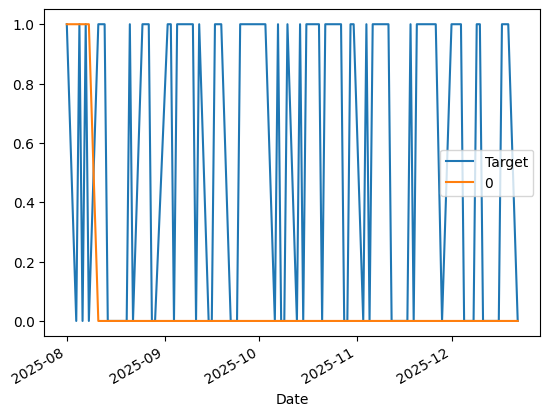

In [70]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [71]:
#backtesting
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test  = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
predictions = backtest(sp500, model, predictors)
predictions["Predictions"].value_counts()



Predictions
0    3891
1    2670
Name: count, dtype: int64

In [72]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5307116104868914

In [73]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.53757
0    0.46243
Name: count, dtype: float64

In [74]:
horizons = [2,5,60,250,1000] #over years if market has gone up or down in comparison
new_predictors = []
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
#creating columns
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]


In [75]:
sp500 = sp500.dropna()

In [76]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-15 00:00:00-05:00,6860.189941,6861.589844,6801.490234,6816.509766,4975600000,6800.259766,0,0.999201,0.0,0.994469,2.0,1.010047,37.0,1.103428,143.0,1.367583,532.0
2025-12-16 00:00:00-05:00,6800.120117,6819.270020,6759.740234,6800.259766,4983180000,6721.430176,0,0.998807,0.0,0.993265,2.0,1.007374,36.0,1.100280,142.0,1.363734,531.0
2025-12-17 00:00:00-05:00,6802.879883,6812.259766,6720.430176,6721.430176,5122120000,6774.759766,1,0.994170,0.0,0.986513,1.0,0.995538,36.0,1.087054,142.0,1.347378,530.0


In [77]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [83]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] #returns probability of fall or rise 
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [85]:
predictions = backtest(sp500,model,new_predictors)

In [86]:
predictions["Predictions"].value_counts()

Predictions
0.0    4687
1.0     873
Name: count, dtype: int64

In [87]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5761741122565864